In [58]:
import pandas as pd 
from pmdarima.arima import auto_arima
from matplotlib import pyplot as plt 
import numpy as np 
from sklearn.metrics import r2_score,mean_squared_error 

In [59]:
data=pd.read_csv('dataset/irondata.csv',parse_dates=['date']) 
df=data 
data.head()

,price,date
0,14.05,1990-01-31
1,14.05,1990-02-28
2,14.05,1990-03-31
3,14.05,1990-04-30
4,14.05,1990-05-31


UNIVARIENT TIME SERIES FORECASTING DATA FROM 1990-2018


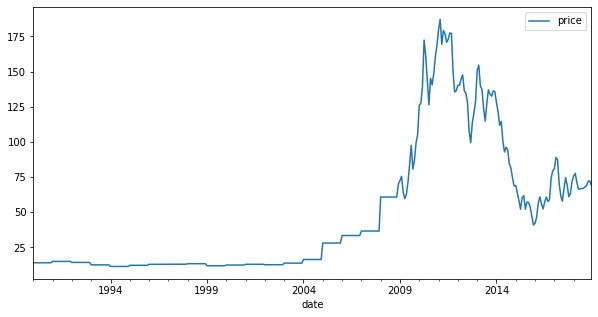

In [60]:
print("UNIVARIENT TIME SERIES FORECASTING DATA FROM 1990-2018")
df=df.set_index("date")
df.plot(figsize=(10,5))

In [61]:
train, test = df[:339], df[339:]

In [62]:
print(len(train))
print(len(test))

339
9


In [63]:
arima = auto_arima(train, error_action='ignore', trace=1, seasonal=True, m=12)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=2146.748, BIC=2154.394, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=2136.578, BIC=2151.870, Fit time=0.153 seconds


C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=2131.271, BIC=2146.564, Fit time=0.249 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=2123.536, BIC=2142.651, Fit time=0.735 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=2131.229, BIC=2146.521, Fit time=0.204 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=2120.036, BIC=2142.974, Fit time=1.218 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=2119.764, BIC=2146.525, Fit time=1.500 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 2, 12); AIC=2124.509, BIC=2147.447, Fit time=1.042 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=2121.014, BIC=2151.599, Fit time=2.323 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 2, 12); AIC=2136.699, BIC=2155.814, Fit time=1.032 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_orde

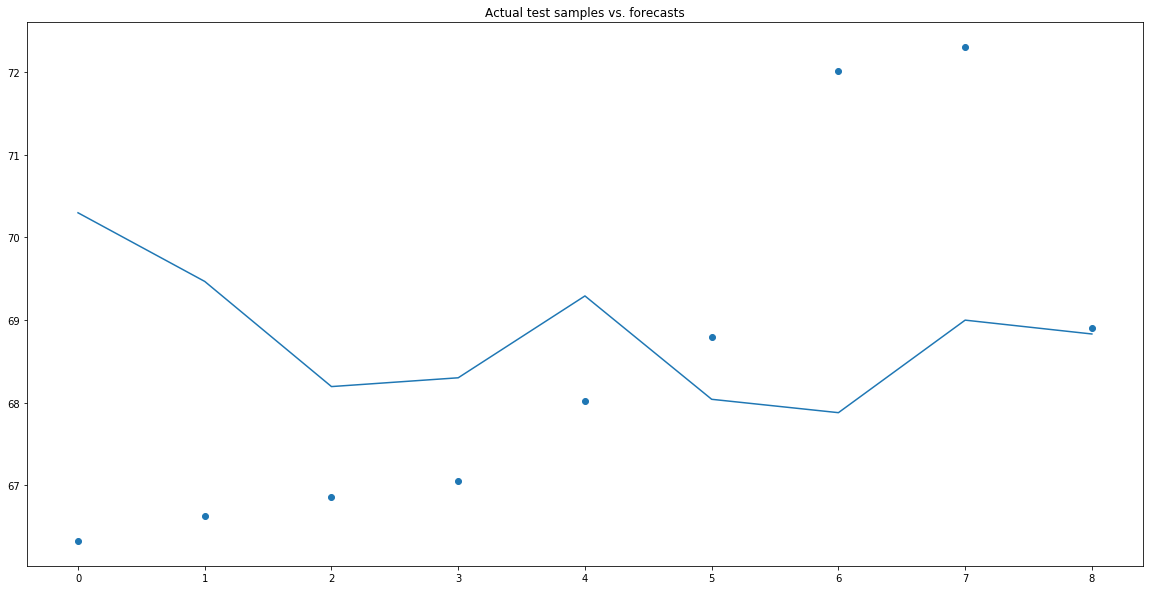

In [64]:
x = np.arange(test.shape[0])
plt.scatter(x, test)
predict=arima.predict(n_periods=test.shape[0])
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts') 
plt.show()

rmse 6.376237287759408


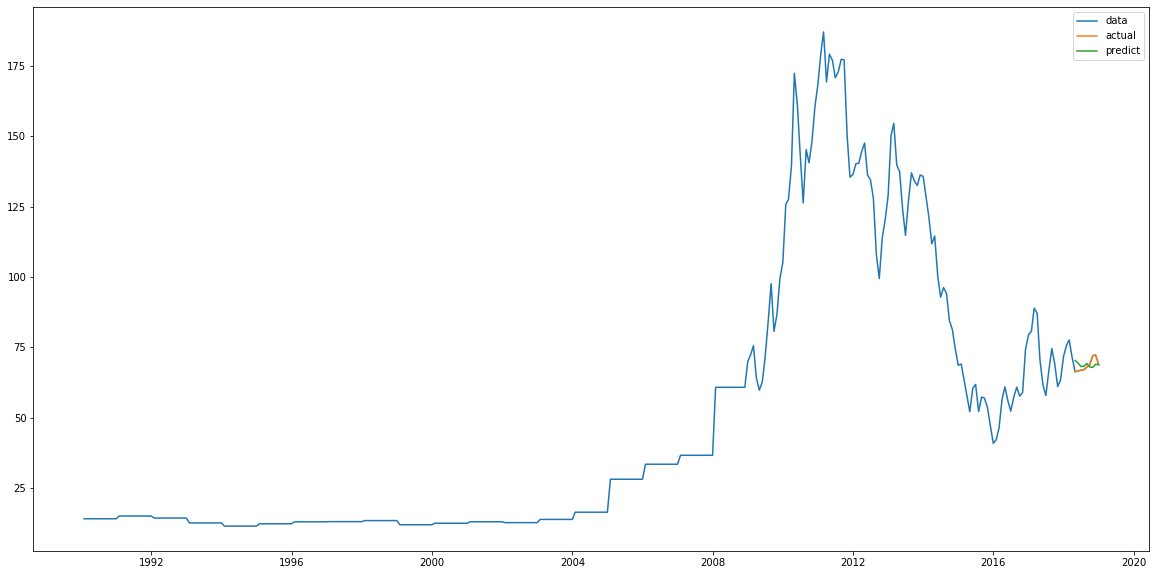

In [65]:
predictdata=pd.DataFrame(predict,index=test.index,columns=['predictprice']) 
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(df) 
plt.plot(test)
plt.plot(predictdata)
plt.gca().legend(('data','actual','predict'))
print('rmse',mean_squared_error(test,predictdata))

In [66]:
predictdata

,predictprice
date,
2018-04-30,70.297937
2018-05-31,69.467029
2018-06-30,68.194514
2018-07-31,68.300994
2018-08-31,69.291512
2018-09-30,68.040560
2018-10-31,67.878772
2018-11-30,68.998645
2018-12-31,68.831007


In [67]:
def forecast_accuracy(forecast, actual): 
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual)) # MAPE 
    me = np.mean(forecast - actual) # ME 
    mae = np.mean(np.abs(forecast - actual)) # MAE 
    mpe = np.mean((forecast - actual)/actual) # MPE 
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1) 
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1) 
    minmax = 1 - np.mean(mins/maxs) # minmax 
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'minmax':minmax})
print(forecast_accuracy(predictdata.values, test.values))
predictdata['actual']=test.values 
print(predictdata)

{'mape': 0.030545927760179288, 'me': 0.26566330293244456, 'mae': 2.1036667543687315, 'mpe': 0.004945329372051665, 'minmax': 0.029858055595864963}
            predictprice  actual
date                            
2018-04-30     70.297937   66.33
2018-05-31     69.467029   66.63
2018-06-30     68.194514   66.86
2018-07-31     68.300994   67.05
2018-08-31     69.291512   68.02
2018-09-30     68.040560   68.80
2018-10-31     67.878772   72.02
2018-11-30     68.998645   72.30
2018-12-31     68.831007   68.90


In [68]:
predictdata

,predictprice,actual
date,,
2018-04-30,70.297937,66.33
2018-05-31,69.467029,66.63
2018-06-30,68.194514,66.86
2018-07-31,68.300994,67.05
2018-08-31,69.291512,68.02
2018-09-30,68.040560,68.80
2018-10-31,67.878772,72.02
2018-11-30,68.998645,72.30
2018-12-31,68.831007,68.90


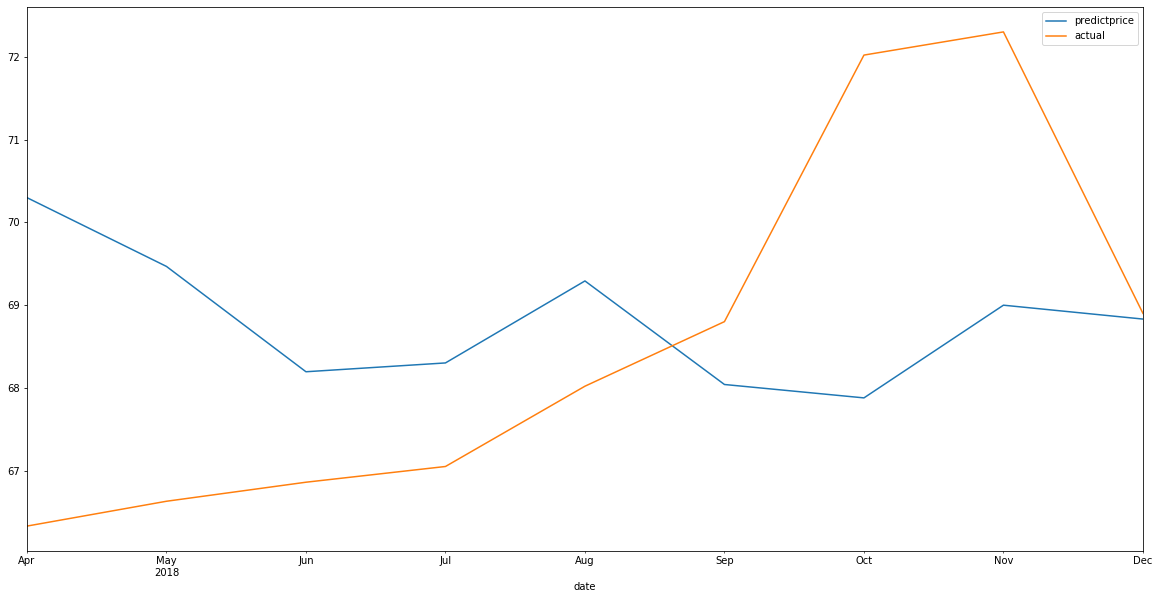

In [69]:
predictdata.plot()

In [70]:
print('forecasting till 2020') 
date_index=pd.date_range(start='1/1/2019', periods=24,freq='M')
data=pd.DataFrame()
data['prediction']=arima.predict(n_periods=24) 
data.index=date_index 
print(data)

forecasting till 2020
            prediction
2019-01-31   70.297937
2019-02-28   69.467029
2019-03-31   68.194514
2019-04-30   68.300994
2019-05-31   69.291512
2019-06-30   68.040560
2019-07-31   67.878772
2019-08-31   68.998645
2019-09-30   68.831007
2019-10-31   69.532002
2019-11-30   70.659053
2019-12-31   70.654328
2020-01-31   68.849897
2020-02-29   66.877316
2020-03-31   65.661190
2020-04-30   67.095839
2020-05-31   68.927210
2020-06-30   67.440329
2020-07-31   66.266387
2020-08-31   67.705663
2020-09-30   68.954499
2020-10-31   69.981583
2020-11-30   71.193409
2020-12-31   70.365630


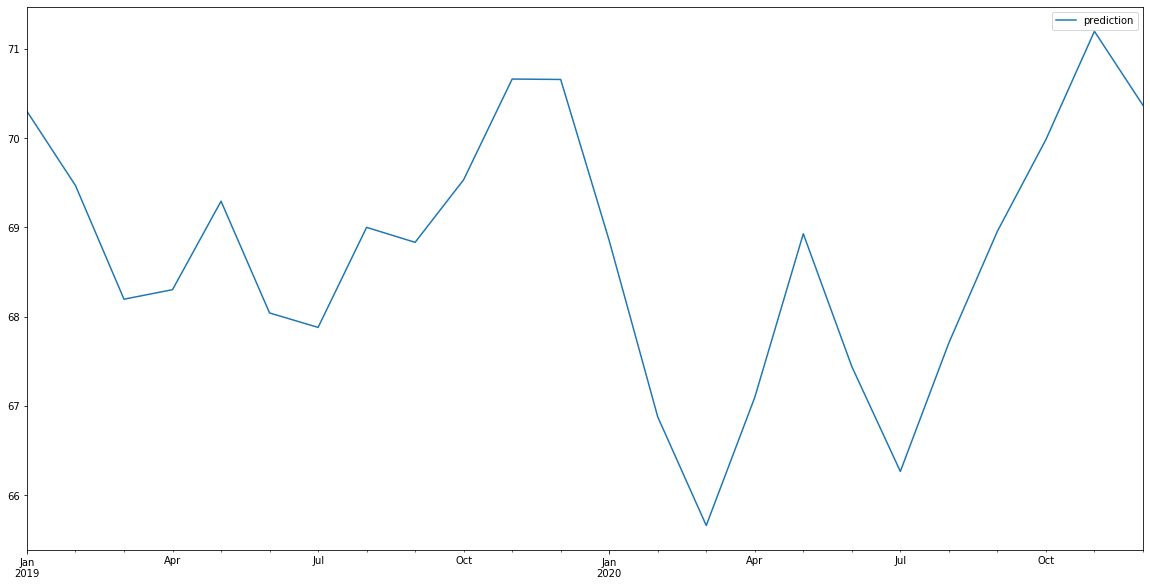

In [71]:
data.plot() #Forecast

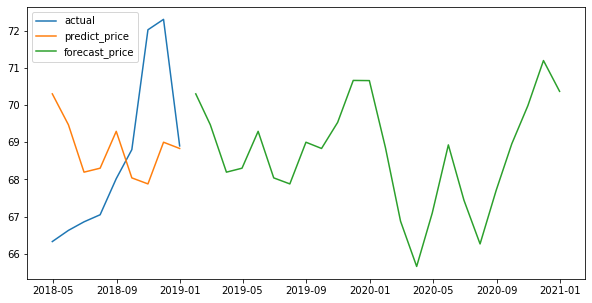

In [76]:
predict=pd.DataFrame(predictdata['actual'],index=df.index)
plt.rcParams["figure.figsize"]=(10,5)
plt.plot(predict)
plt.plot(predictdata['predictprice'])
plt.plot(data)
plt.gca().legend(('actual','predict_price','forecast_price'))

,prediction
2019-01-31,70.297937
2019-02-28,69.467029
2019-03-31,68.194514
2019-04-30,68.300994
2019-05-31,69.291512
2019-06-30,68.040560
2019-07-31,67.878772
2019-08-31,68.998645
2019-09-30,68.831007
2019-10-31,69.532002
